In [ ]:
# !pip install ale-py==0.7.4
!pip install sb3_contrib
!pip install stable_baselines3
# !pip install stable_baselines3[extra]

     |████████████████████████████████| 62 kB 483 kB/s 
     |████████████████████████████████| 177 kB 10.4 MB/s 
     |████████████████████████████████| 1.5 MB 43.9 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616823 sha256=7a3db8d2919919f6cc0f178fdf56bccc2ddd192efddaac14dabbccaa0f054c00
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3


In [ ]:
import gym
from sb3_contrib import QRDQN
# from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from time import perf_counter
from matplotlib import pyplot as plt

In [ ]:
# env = make_atari_env('Breakout-v0')
env = gym.make('CartPole-v1')
quantiles_domain = range(1, 150, 20)

In [ ]:
# ATARI
# hyperparams = {
#   "exploration_fraction": 0.025,  # explore 250k steps = 10M * 0.025
#   "optimize_memory_usage": True
# }
# CARTPOLE
hyperparams = {
"learning_rate": 0.001,
"batch_size": 64,
"buffer_size": 100000,
"learning_starts": 1000,
"target_update_interval": 10,
"train_freq": 256,
"gradient_steps": 128,
"exploration_fraction": 0.16,
"exploration_final_eps": 0.04
}

In [ ]:
means = []
stds = []
times = []

# MlpPolicy for CartPole; CnnPolicy for Atari
for q in quantiles_domain:
    model = QRDQN('MlpPolicy', env, verbose=0, **hyperparams, policy_kwargs=dict(n_quantiles=q))

    start_perf = perf_counter()
    model.learn(total_timesteps=20000)  # how many for CartPole?
    end_perf = perf_counter()
    
    val, std = evaluate_policy(model, Monitor(env), n_eval_episodes=150)  # 200 for CartPole
    
    means.append(val)
    stds.append(std)
    print(f"mean reward: {val}; std: {std}")
    times.append(end_perf - start_perf)
    print(f"training time: {end_perf - start_perf}")

mean reward: 101.64666666666666; std: 15.684445231573294
training time: 33.573074592
mean reward: 214.74666666666667; std: 20.537506069519626
training time: 34.183338907999996
mean reward: 151.66; std: 5.0791469099971245
training time: 65.05115510800002
mean reward: 165.32666666666665; std: 7.0978838787032545
training time: 97.87979815900002
mean reward: 128.54666666666665; std: 5.196905061882719
training time: 146.88856459100003
mean reward: 157.38; std: 20.69578701088702
training time: 213.80386886899998
mean reward: 151.66666666666666; std: 10.136841497999047
training time: 292.39408583700003
mean reward: 138.59333333333333; std: 9.95328868040888
training time: 407.5536899020001


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

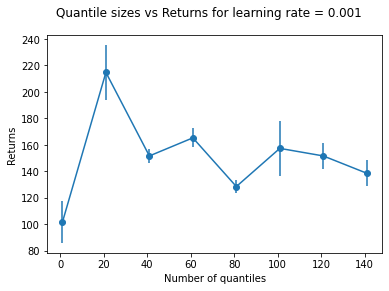

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Number of quantiles")
plt.ylabel("Returns")

ax.errorbar(quantiles_domain, means, yerr=stds, fmt='-o');

title = str("Quantile sizes vs Returns for learning rate = 0.001")
plt.suptitle(title, fontsize=12)
plt.savefig("Quantiles_returns_0.001.jpg", dpi = 300, bbox_inches = 'tight')
files.download("Quantiles_returns_0.001.jpg") 
plt.show()

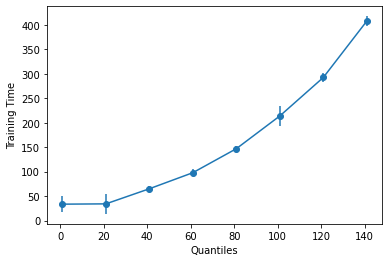

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Quantiles")
plt.ylabel("Training Time (seconds)")

ax.errorbar(quantiles_domain, times, yerr=stds, fmt='-o');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

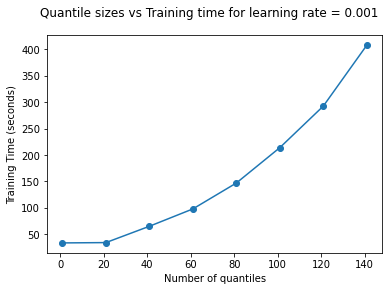

In [ ]:
from google.colab import files
fig, ax = plt.subplots()
plt.xlabel("Number of quantiles")
plt.ylabel("Training Time (seconds)")
ax.errorbar(quantiles_domain, times, fmt='-o');



title = str("Quantile sizes vs Training time for learning rate = 0.001")
plt.suptitle(title, fontsize=12)
plt.savefig("Quantiles_training_time_0.001.jpg", dpi = 300, bbox_inches = 'tight')
files.download("Quantiles_training_time_0.001.jpg") 
plt.show()

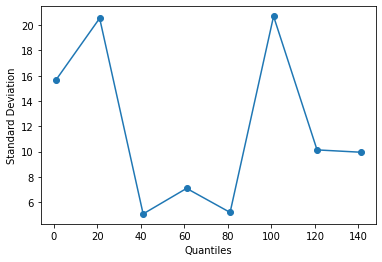

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Quantiles")
plt.ylabel("Standard Deviation")
ax.errorbar(quantiles_domain, stds, fmt='-o');